In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Classification

For classification, our aim is to fin dthe largest possible street between 2 classes, while limiting margin violations

## Linear SVMs

### Soft margin classification

In [2]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # Iris virginica

svm_clf = make_pipeline(
    StandardScaler(), # scaling is important for SVMs
    LinearSVC(C=1, random_state=42)
)

# the parameter C determines how sensitive the model is to outliers.
# reducing C reduces overfitting, but may lead to an unreliable model

svm_clf.fit(X, y)


c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [3]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [4]:
# the SVM makes its decision based off of signed distances to the boundary:

svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

## Nonlinear SVCs

For full illustrations, see the book notebook

The first option is to add polynomial features to the dataset:

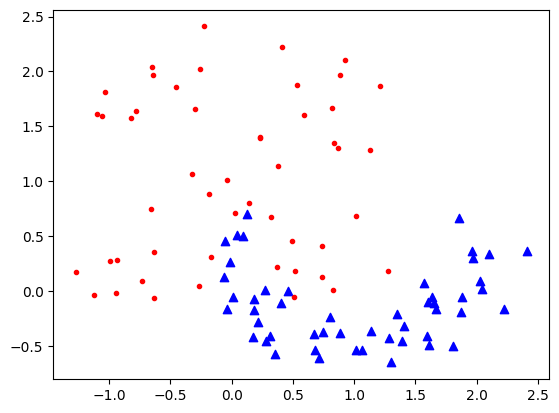

In [5]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)


plt.scatter(X[y==1][:, 0], X[y==1][:, 1], marker="^", c="blue")
plt.scatter(X[y==0][:, 0], X[y==1][:, 0], marker=".", c="red")


In [6]:

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10000, random_state=42)
)

polynomial_svm_clf.fit(X, y)

c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

We can also use the ketnel trick for better results:

In [8]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0 = 1, C=5))

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

We can also use Gaussian RBFs, which measure the similarity of every point to a given landmark point

To avoid having to create a landmark at every point in the dataset, as is customary, we can use the kernel trick again:

In [9]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

# Regression

We now aim to get as many instances as possible on the street, whilst limiting the number of points off the street

The street width is determined by $\varepsilon$

In [11]:
'''
from sklearn.svm import LinearSVR

X, y = [...]  # a linear dataset
svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, random_state=42))
svm_reg.fit(X, y)
'''

'\nfrom sklearn.svm import LinearSVR\n\nX, y = [...]  # a linear dataset\nsvm_reg = make_pipeline(StandardScaler(),\n                        LinearSVR(epsilon=0.5, random_state=42))\nsvm_reg.fit(X, y)\n'

In [12]:
'''
from sklearn.svm import SVR

X, y = [...]  # a quadratic dataset
svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)
'''

'\nfrom sklearn.svm import SVR\n\nX, y = [...]  # a quadratic dataset\nsvm_poly_reg = make_pipeline(StandardScaler(),\n                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))\nsvm_poly_reg.fit(X, y)\n'

# Training SVMs

SVMs can be trained by either:

* Mathematically minimising the street size, while keeping violations to a minimum; the tradeoff between these two objectives is controlled by the hyperparameter `C`

The street width is maximised my minimising the weights, i.e $\frac{1}{2}\bm{w}^\intercal\bm{w}$

To avoid margin violations, we define $t^{(i)}$ to be 1 for positive instances, and -1 for negative instances. For each instance we define a slack variable $\zeta^{(i)}$ which defines how much violation we're allowed, and $C$ which is the tradeoff between the two objectives. Then, we have:

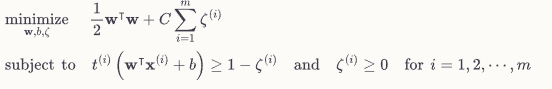

* Using gradient descent to minimise the (squared) hinge loss, which is 0 if the point is on the correct side and off the street, and takes varying non-zero values otherwise. The choise between squared or non-squared determines how sensitive the model is to outliers (linear vs quadratic scaling)



## The Kernel trick

The Kernel trick takes advantage of the fact that we can avoid performing transformations (eg polynomial or Gaussian RBF) on our data, since we can get the same expressions when solving the dual problem using dot products of the original data instead.